In [45]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [56]:
omega = ['02', '06', '006', '08', '09', '11', '13', '15', '17', '18', '20','21', '23', '24', '25']

filename =f"data_new/omega_{omega[10]}.hdf5"
with h5py.File(filename, "r") as f:
    pressure_re = f["pressure_re"][:]
    pressure_im = f["pressure_im"][:]

In [57]:
pressure_re.shape

(32, 50, 256, 1024)

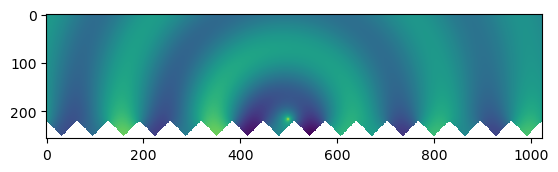

In [70]:
plt.imshow(pressure_re[1,0])

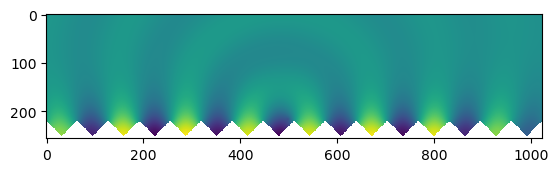

In [6]:
plt.imshow(pressure_re[30])

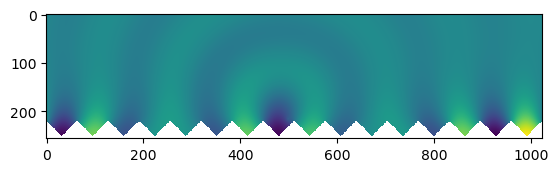

In [8]:
plt.imshow(pressure_im[30])

In [ ]:
#Code to generate the new data: 
xsource = np.array([[xsources[0,0]], [xsources[1,0]]])
omega = allks[0]

filename = "data/polymathic-omega-{}-x0-{}-{}-u.hdf5".format(str(omega).replace(".",""), str(xsource[0,0]).replace(".",""), str(xsource[1,0]).replace(".",""))

with h5py.File(filename, 'r') as f:
    pressure_re = f['pressure_re'][:]
    pressure_im = f['pressure_im'][:]
xsources = np.array([[-0.4, -0.4, -0.4, -0.4, -0.3, -0.3, -0.3, -0.2, -0.2, -0.2, -0.1, -0.1, 0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, -0.4, -0.3, 0.0, 0.0, 0.3, 0.4], [-0.2, 0.0, 0.2, 0.4, -0.1, 0.1, 0.3, 0.0, 0.2, 0.4, 0.1, 0.3, 0.2, 0.4, 0.1, 0.3, 0.0, 0.2, 0.4, -0.1, 0.1, 0.3, -0.2, 0.0, 0.2, 0.4, -0.1, 0.0, 0.1, 0.3, 0.0, -0.1]])
allkappasfile = "disprel.txt"
allkappasdat = np.loadtxt(allkappasfile)
allks = allkappasdat[:-3:3,1]

import h5py

# List of (frequency, position) tuples
combinations = [
    (-0.4, 0.4), (-0.4, 0.2), (-0.4, 0.0), (-0.4, -0.2), (-0.4, -0.1),
    (-0.3, 0.3), (-0.3, 0.1), (-0.3, 0.0), (-0.3, -0.1),
    (-0.2, 0.4), (-0.2, 0.2), (-0.2, 0.0),
    (-0.1, 0.3), (-0.1, 0.1),
    (0.0, 0.1), (0.0, 0.2), (0.0, 0.3), (0.0, 0.4),
    (0.1, 0.1), (0.1, 0.3),
    (0.2, 0.0), (0.2, 0.2), (0.2, 0.4),
    (0.3, -0.1), (0.3, 0.0), (0.3, 0.1), (0.3, 0.3),
    (0.4, -0.1), (0.4, -0.2), (0.4, 0.0), (0.4, 0.2), (0.4, 0.4)
]

# Function to generate filename
def generate_filename(pos0, pos1):
    return "data/polymathic-omega-043929688752096285-x0-{}-{}-u.hdf5".format(str(pos0).replace(".",""), str(pos1).replace(".",""))

new_filename = "data_new/omega_04.hdf5"

data_re =np.zeros((32, 50, 256, 1024), dtype='float32')
data_im =np.zeros((32, 50, 256, 1024), dtype='float32')
# Process each file
i = 0
for pos0, pos1 in combinations:
    filename = generate_filename(pos0, pos1)
    try:
        with h5py.File(filename, 'r') as file:
            # Assuming a dataset named 'data' exists, you may need to adjust this
            data_re[i,:,:,:] = file['pressure_re'][:]
            data_im[i,:,:,:] = file['pressure_im'][:]
            print(f'Successfully read from {filename}')
            # Process the data as needed here

            i += 1

    except Exception as e:
        print(f'Failed to read {filename}: {e}')
with h5py.File(new_filename, 'w') as new_file:
    new_file.create_dataset('pressure_re', data=data_re, shape=data_re.shape, dtype='float32')
    new_file.create_dataset('pressure_im', data=data_im, shape=data_im.shape, dtype='float32')